<a href="https://colab.research.google.com/github/MDankloff/Delayed-Fairness-Project/blob/main/Cloned_LTFpop_WP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone from Delayed Fairness Repo

In [4]:
!git clone https://github.com/MDankloff/Delayed-Fairness-Project.git

%cd Delayed-Fairness-Project
!git pull origin main

import sys
sys.path.append('Synthetic/src')

fatal: destination path 'Delayed-Fairness-Project' already exists and is not an empty directory.
/Users/jh22215/Documents/GitHub/Delayed-Fairness-Project/Delayed-Fairness-Project
From https://github.com/MDankloff/Delayed-Fairness-Project
 * branch            main       -> FETCH_HEAD
Already up to date.


In [5]:
# from generator import *
from evaluation import *
from fair_model import FairModel
from baselines import LR, CvxFairModel, EOFairModel
from simulator import *
from utils import combine_tuples
import numpy as np


In [6]:
# Build Bank model
bank = Bank()
agent_train = Agent(n_samples=4000, protect_ratio=0.5, eps=0.5, base=[0.2, 1.0], seed=2026)
agent_test = Agent(n_samples=1000, protect_ratio=0.5, eps=0.5, base=[0.2, 1.0], seed=2027)

In [7]:
steps = 5

s_train, adj, edges, Xs_train, Ys_train, Ds_train, Ps, Os, Us, As_train = run_simulation(
    decision_model=bank,
    repayment_model=bank,
    agent=agent_train,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 )

s_test, adj, edges, Xs_test, Ys_test, Ds_test, Ps, Os, Us, As_test = run_simulation(
    decision_model=bank,
    repayment_model=bank,
    agent=agent_test,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 )
s_comb, X_comb, Y_comb = combine_tuples_active_only(s_train, Xs_train, Ys_train,As_train)

In [19]:
lr = LR(l2_reg=1e-5)
lr.train(s_comb, X_comb, Y_comb)

steps = 5

# run_simulation returns: s, adj, edges, Xs, Ys, Ds, Ps, Os, Us, As
s_lr, adj_lr, edges_lr, Xs_lr, Ys_lr, Ds_lr, Ps_lr, Os_lr, Us_lr, As_lr = run_simulation(
    decision_model=lr,
    repayment_model=bank,
    agent=agent_test,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 )

compute_statistics(s_lr, Xs_lr, Ds_lr, lr, OYs=Ys_lr, As=As_lr)

------------------------------ Step 1 - Logistic Regression ------------------------------
Acc: 70.7%
Retention: 100.0%
Retention Disparity: 0.000
Short Fairness: 0.106
Long fairness: 0.060
------------------------------ Step 2 - Logistic Regression ------------------------------
Acc: 73.0%
Retention: 71.6%
Retention Disparity: 0.248
Short Fairness: 0.108
Long fairness: 0.125
------------------------------ Step 3 - Logistic Regression ------------------------------
Acc: 73.3%
Retention: 43.6%
Retention Disparity: 0.284
Short Fairness: 0.108
Long fairness: 0.137
------------------------------ Step 4 - Logistic Regression ------------------------------
Acc: 70.4%
Retention: 33.5%
Retention Disparity: 0.282
Short Fairness: 0.110
Long fairness: 0.167
------------------------------ Step 5 - Logistic Regression ------------------------------
Acc: 72.9%
Retention: 26.5%
Retention Disparity: 0.266
Short Fairness: 0.110
Long fairness: 0.193




In [18]:
d = X_comb.shape[1]            # number of X columns
cfm = CvxFairModel(n_features=d + 1, l2_reg=1e-5, tao=1.565)  # s + X

# cfm = CvxFairModel(n_features=len(Xs_train[0][0])+2, l2_reg=1e-5, tao=1.565)

cfm.train(s_comb, X_comb, Y_comb)

s_cfm, adj_cfm, edges_cfm, Xs_cfm, Ys_cfm, Ds_cfm, Ps_cfm, Os_cfm, Us_cfm, As_cfm = run_simulation(
    decision_model=cfm,
    repayment_model=bank,
    agent=agent_test,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 )

compute_statistics(s_cfm, Xs_cfm, Ds_cfm, cfm, OYs=Ys_cfm, As=As_cfm)

[Fair Model with Demographic Parity] status: optimal, loss: 0.5912
------------------------------ Step 1 - Fair Model with Demographic Parity ------------------------------
Acc: 68.3%
Retention: 100.0%
Retention Disparity: 0.000
Short Fairness: 0.170
Long fairness: 0.262
------------------------------ Step 2 - Fair Model with Demographic Parity ------------------------------
Acc: 70.1%
Retention: 78.4%
Retention Disparity: 0.008
Short Fairness: 0.180
Long fairness: 0.288
------------------------------ Step 3 - Fair Model with Demographic Parity ------------------------------
Acc: 69.6%
Retention: 50.5%
Retention Disparity: 0.010
Short Fairness: 0.182
Long fairness: 0.307
------------------------------ Step 4 - Fair Model with Demographic Parity ------------------------------
Acc: 68.8%
Retention: 38.6%
Retention Disparity: 0.028
Short Fairness: 0.178
Long fairness: 0.523
------------------------------ Step 5 - Fair Model with Demographic Parity ------------------------------
Acc: 69.4%

In [16]:
eqm = EOFairModel(n_features=len(Xs_train[0][0])+2, l2_reg=1e-5, tao=1.5)
eqm.train(s_comb, X_comb, Y_comb)

s_eqm, adj_eqm, edges_eqm, Xs_eqm, Ys_eqm, Ds_eqm, Ps_eqm, Os_eqm, Us_eqm, As_eqm = run_simulation(
    decision_model=eqm,
    repayment_model=bank,
    agent=agent_test,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 )

compute_statistics(s_eqm, Xs_eqm, Ds_eqm, eqm, OYs=Ys_eqm, As=As_eqm)

[Fair Model with Equal Oppertunity] status: optimal, loss: 0.5788
------------------------------ Step 1 - Fair Model with Equal Oppertunity ------------------------------
Acc: 70.1%
Retention: 100.0%
Retention Disparity: 0.000
Short Fairness: 0.052
Long fairness: 0.102
------------------------------ Step 2 - Fair Model with Equal Oppertunity ------------------------------
Acc: 72.3%
Retention: 76.3%
Retention Disparity: 0.110
Short Fairness: 0.042
Long fairness: 0.154
------------------------------ Step 3 - Fair Model with Equal Oppertunity ------------------------------
Acc: 72.0%
Retention: 50.7%
Retention Disparity: 0.078
Short Fairness: 0.044
Long fairness: 0.155
------------------------------ Step 4 - Fair Model with Equal Oppertunity ------------------------------
Acc: 70.6%
Retention: 37.9%
Retention Disparity: 0.098
Short Fairness: 0.046
Long fairness: 0.159
------------------------------ Step 5 - Fair Model with Equal Oppertunity ------------------------------
Acc: 71.6%
Reten

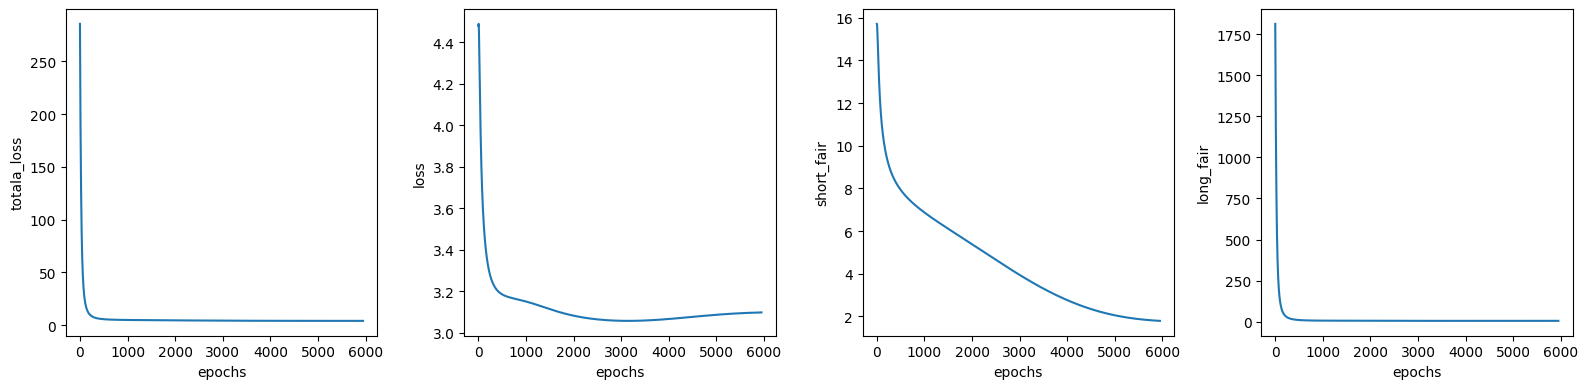

In [11]:
fm = FairModel(n_features=len(Xs_train[0][0])+1, lr=5e-3, l2_reg=1e-5, sf_reg=0.119, lf_reg=0.154)
fm.train(s_train, Xs_train, Ys_train, Xs_train, Ys_train, epochs=1000, plot=True)

num_iters = 50

theta_true = fm.params
theta_list     = [np.copy(theta_true)]
theta_gaps     = []


# inital theta
theta = np.copy(theta_true)

for t in range(num_iters):
    # adjust distribution to current theta
    s, adj, edges, Xs, Ys, Ds, Ps, Os, Us, As = run_simulation(
    decision_model=fm,
    repayment_model=bank,
    agent=agent_train,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 ) 
    # learn on induced distribution
    fm.train(s_train, Xs_train, Ys_train, Xs, Ys, epochs=10, plot=False)
    D_last = np.asarray(Ds[-1]).astype(int)   # decisions at t*
    A_last = np.asarray(As[-1]).astype(int)   # active/applying at t*
    approval_all = D_last.mean()
    retention = A_last.mean()
    approval_active = D_last[A_last == 1].mean() if (A_last == 1).any() else float("nan")

    # keep track of statistic
    theta_new = fm.params
    gap = np.linalg.norm(theta_new - theta)
    theta_gaps.append(gap)
    theta_list.append(np.copy(theta_new))

    theta = np.copy(theta_new)

In [17]:
s_fm, adj_fm, edges_fm, Xs_fm, Ys_fm, Ds_fm, Ps_fm, Os_fm, Us_fm, As_fm = run_simulation(
    decision_model=fm,
    repayment_model=bank,
    agent=agent_test,
    steps=steps,
    enforce_demographic_mixing=True,
    k_same=8,
    k_other=2,
    directed=False,
    graph_seed=2026,
    seed=2026,
    decision_coef=0.8,
    repayment_coef=0.8,
 )

compute_statistics(s_fm, Xs_fm, Ds_fm, fm, OYs=Ys_fm, As=As_fm)

------------------------------ Step 1 - Long-term Fair Model ------------------------------
Acc: 68.9%
Retention: 100.0%
Retention Disparity: 0.000
Short Fairness: 0.132
Long fairness: 0.074
------------------------------ Step 2 - Long-term Fair Model ------------------------------
Acc: 69.7%
Retention: 79.7%
Retention Disparity: 0.006
Short Fairness: 0.130
Long fairness: 0.102
------------------------------ Step 3 - Long-term Fair Model ------------------------------
Acc: 68.9%
Retention: 55.9%
Retention Disparity: 0.022
Short Fairness: 0.130
Long fairness: 0.117
------------------------------ Step 4 - Long-term Fair Model ------------------------------
Acc: 67.3%
Retention: 43.1%
Retention Disparity: 0.010
Short Fairness: 0.136
Long fairness: 0.248
------------------------------ Step 5 - Long-term Fair Model ------------------------------
Acc: 68.0%
Retention: 32.7%
Retention Disparity: 0.018
Short Fairness: 0.134
Long fairness: 0.382




Metrics computed for: ['LR', 'FMDP', 'FMEO', 'FMLT']


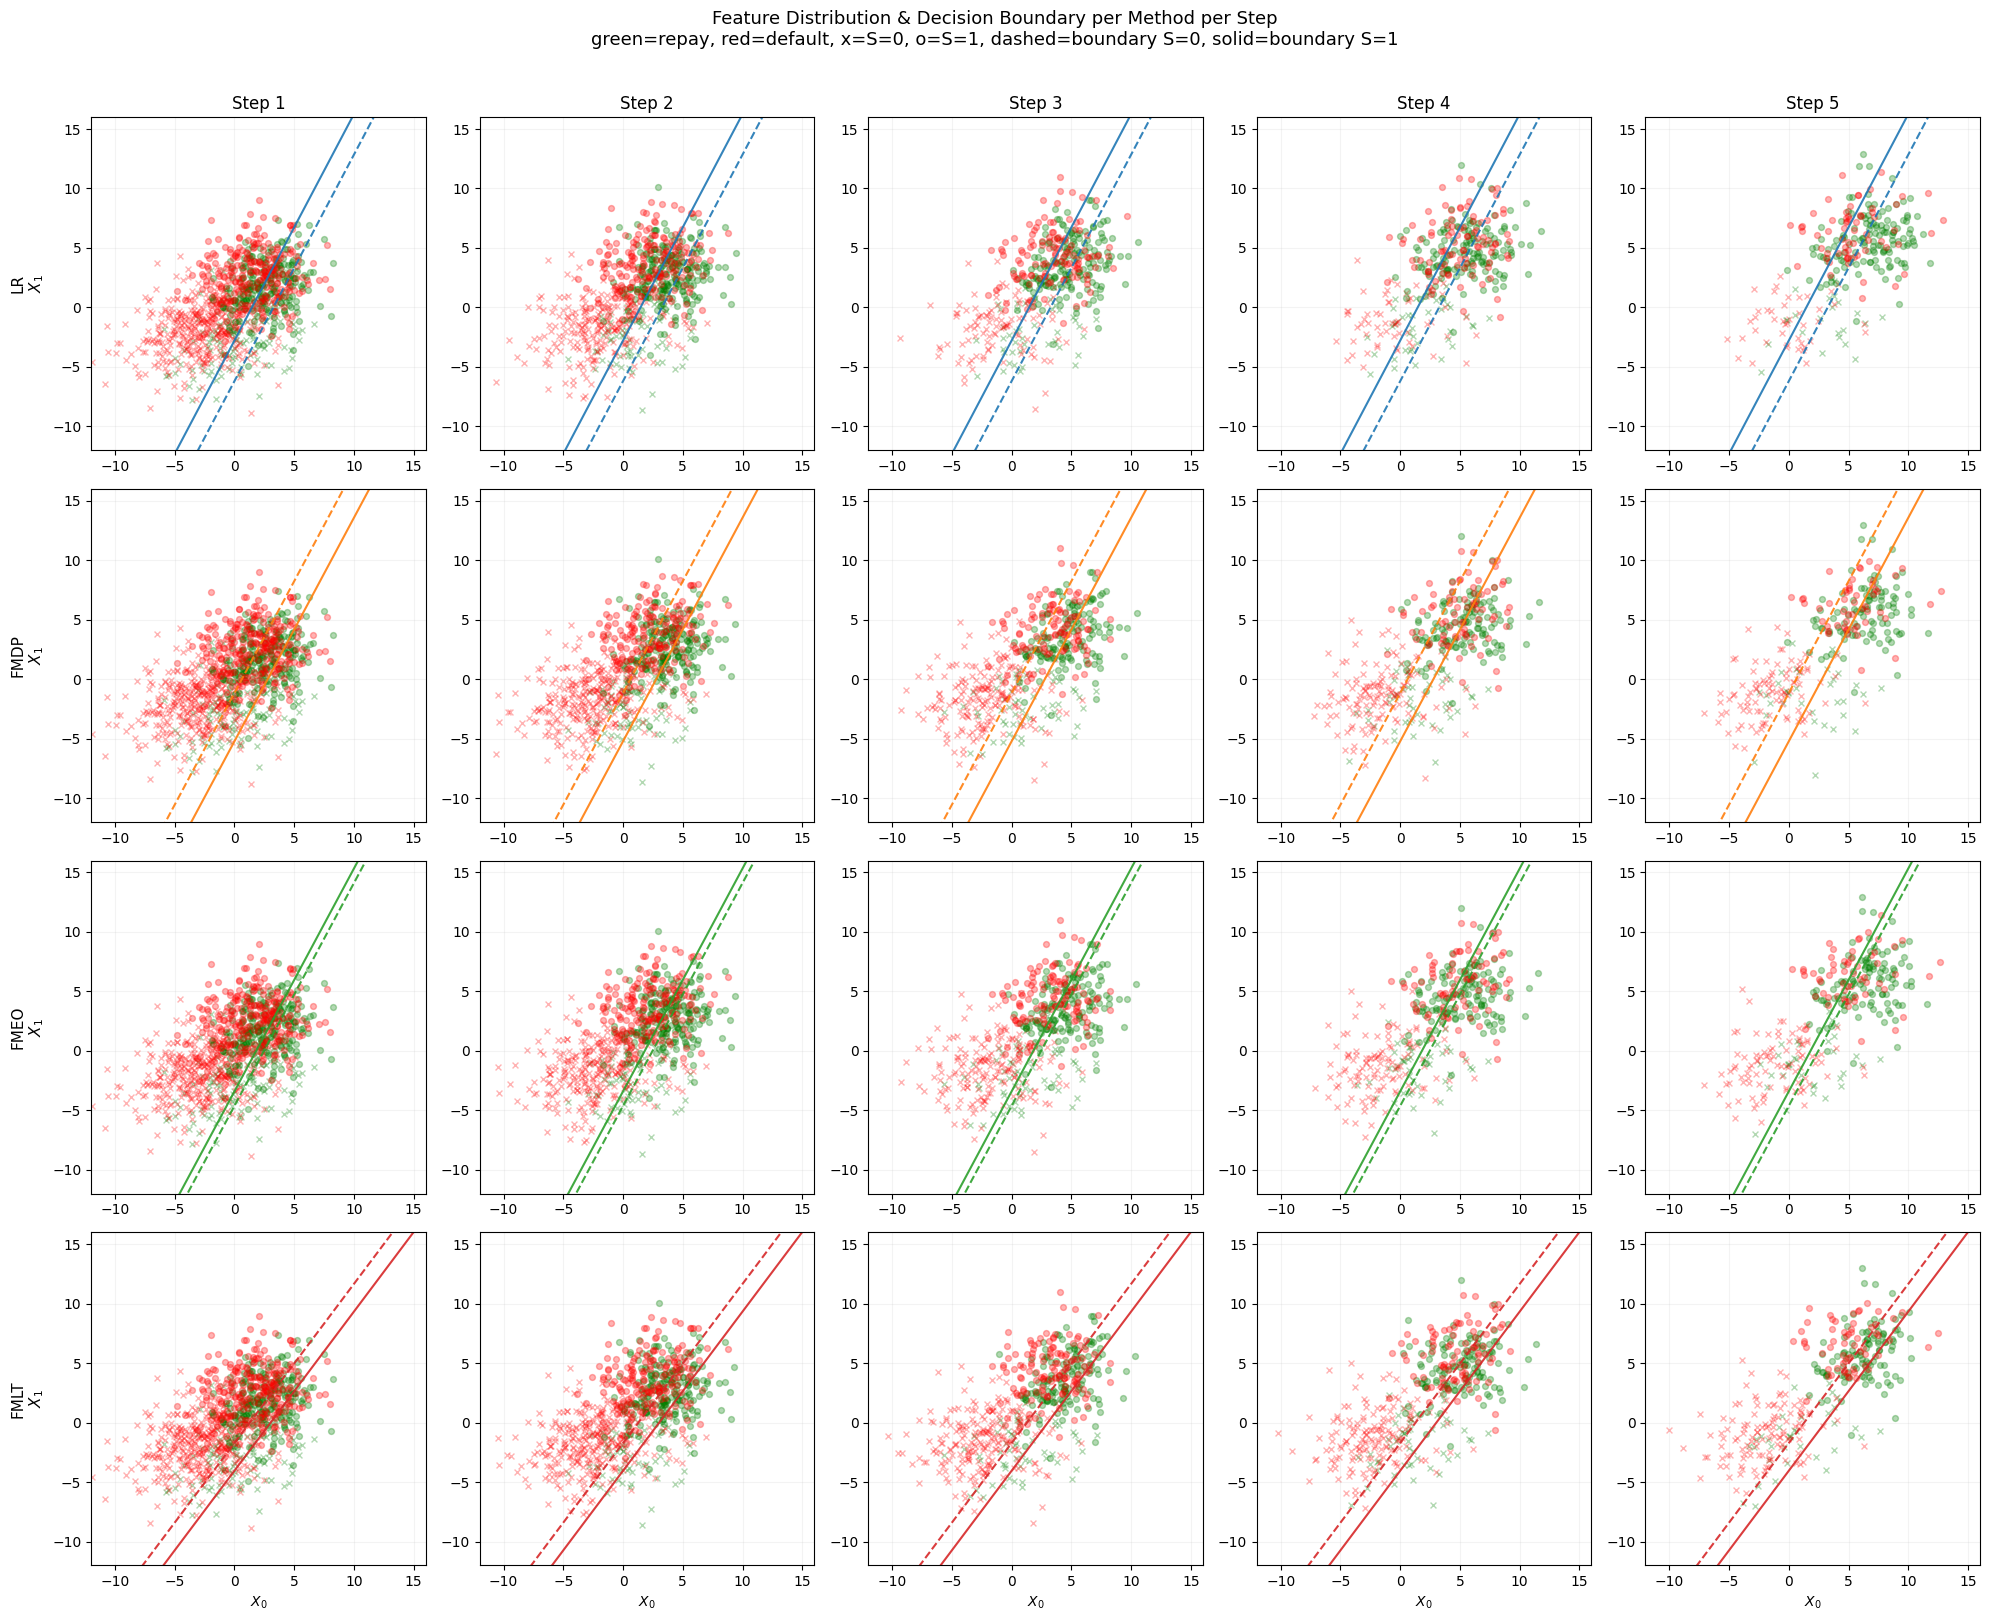

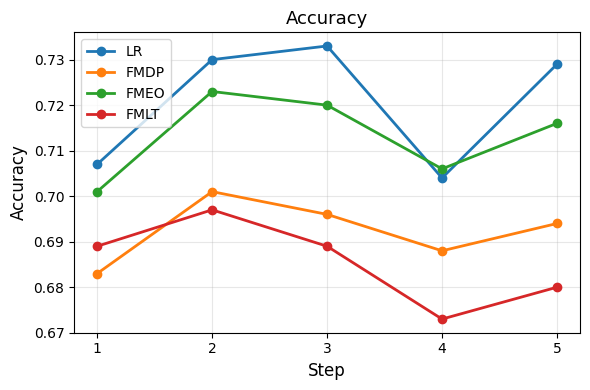

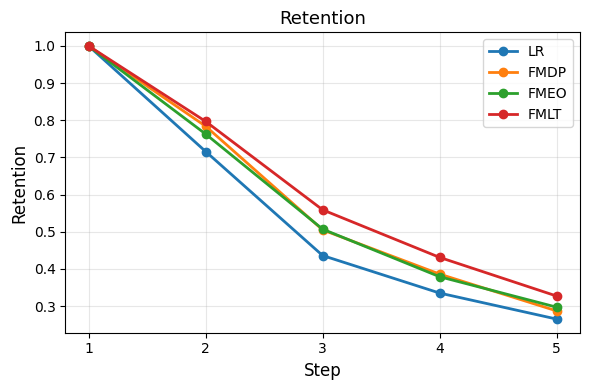

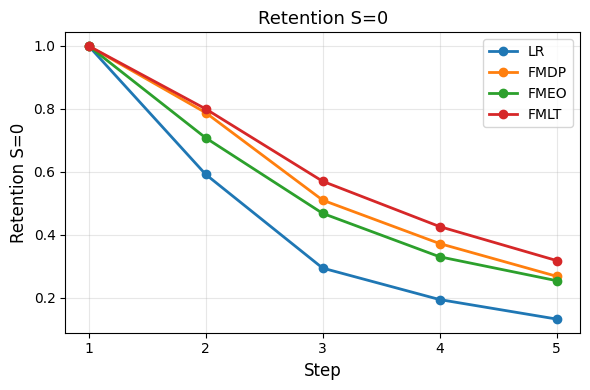

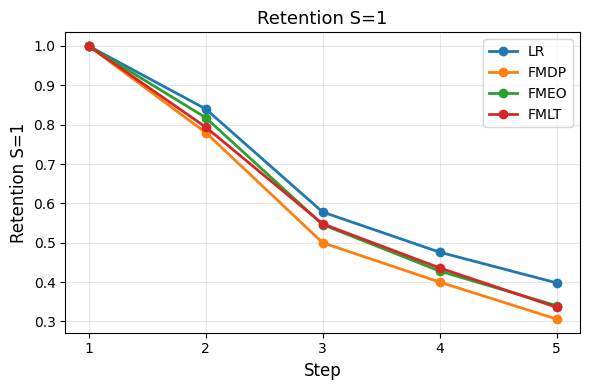

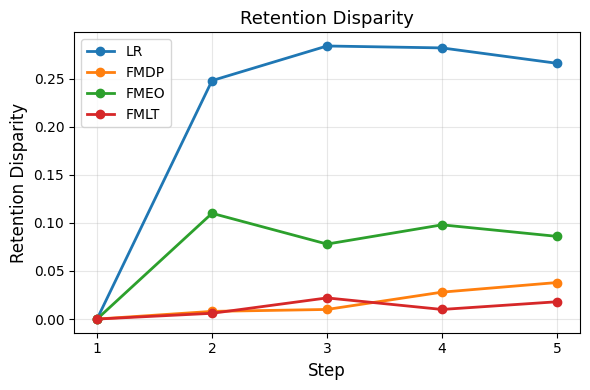

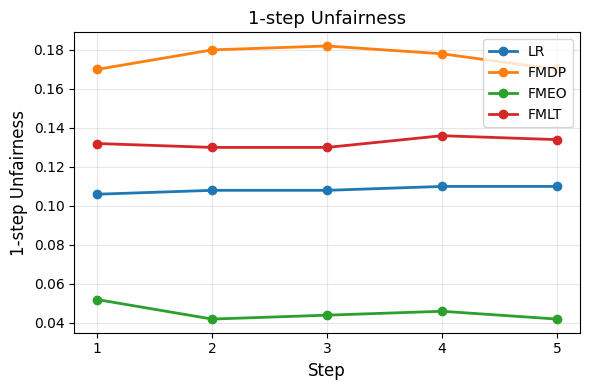

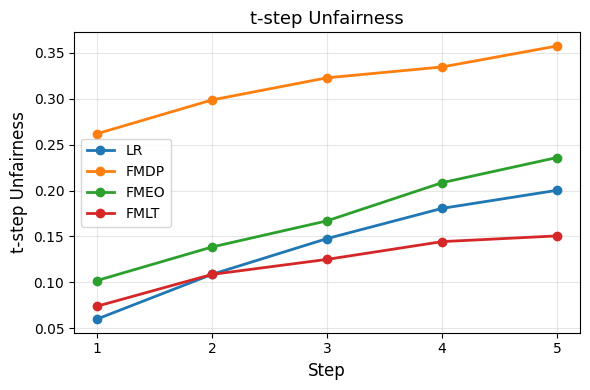

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# ── 1. Reuse simulation results from previous cells (no new simulations) ──
models = [
    ("LR", lr),
    ("FMDP", cfm),
    ("FMEO", eqm),
    ("FMLT", fm),
]
colors = {
    "LR": "tab:blue",
    "FMDP": "tab:orange",
    "FMEO": "tab:green",
    "FMLT": "tab:red",
}

results = {
    "LR":   {"model": lr,  "s": s_lr,  "Xs": Xs_lr,  "Ys": Ys_lr,  "Ds": Ds_lr,  "As": As_lr},
    "FMDP": {"model": cfm, "s": s_cfm, "Xs": Xs_cfm, "Ys": Ys_cfm, "Ds": Ds_cfm, "As": As_cfm},
    "FMEO": {"model": eqm, "s": s_eqm, "Xs": Xs_eqm, "Ys": Ys_eqm, "Ds": Ds_eqm, "As": As_eqm},
    "FMLT": {"model": fm,  "s": s_fm,  "Xs": Xs_fm,  "Ys": Ys_fm,  "Ds": Ds_fm,  "As": As_fm},
}

# ── 2. Compute metrics for each model ──
T = 5
step_arr = np.arange(1, T + 1)

metrics = {}
for name, res in results.items():
    s_eval = s_test
    model = res["model"]
    Xs, Ys, Ds, As = res["Xs"], res["Ys"], res["Ds"], res["As"]
    s_e = np.asarray(s_eval).astype(int)

    accs, s_fairs, l_fairs = [], [], []
    retention = compute_retention_rate(Xs, As)
    ret_disp = compute_retention_disparity(s_e, As)

    d0 = max(1, int((s_e == 0).sum()))
    d1 = max(1, int((s_e == 1).sum()))
    ret0, ret1 = np.ones(T), np.ones(T)
    for t in range(T):
        A_t = np.asarray(As[t]).astype(int)
        ret0[t] = (A_t[s_e == 0] == 1).sum() / d0
        ret1[t] = (A_t[s_e == 1] == 1).sum() / d1

    for i in range(T):
        accs.append(compute_accuracy(s_e, Xs[i], Ys[i], model))
        s_fairs.append(abs(compute_short_cond_fairness(s_e, Xs[i], model)))
        if i == 0:
            l_fairs.append(abs(compute_post_long_cond_fairness(s_e, Xs[:i+1], model)))
        else:
            prob = compute_post_long_cond_probs(s_e, Xs[:i+1], Ys[:i+1])
            l_fairs.append(abs(compute_post_long_cond_fairness(s_e, Xs[:i+1], model, prob)))

    metrics[name] = {
        "acc": np.array(accs), "retention": retention,
        "ret0": ret0, "ret1": ret1,
        "s_fair": np.array(s_fairs), "l_fair": np.array(l_fairs),
        "ret_disp": ret_disp,
    }

print("Metrics computed for:", list(metrics.keys()))

# ── 3. Decision boundary helper ──
def get_boundary(model, x_range=(-10, 15)):
    params = model.params
    if params is None or abs(params[2]) < 1e-12:
        return None
    x = np.linspace(*x_range, 200)
    y0 = (-params[-1] - params[0] * 0 - params[1] * x) / params[2]
    y1 = (-params[-1] - params[0] * 1 - params[1] * x) / params[2]
    return x, y0, y1

# ── 4. X0 vs X1: grid of (methods x steps), each with its OWN data ──
method_names = [name for name, _ in models]
n_methods = len(method_names)

fig, axes = plt.subplots(n_methods, T, figsize=(4 * T, 4 * n_methods))
for row, name in enumerate(method_names):
    res = results[name]
    model = res["model"]
    s_e = np.asarray(s_test).astype(int)
    bnd = get_boundary(model)

    for t in range(T):
        ax = axes[row, t]
        X_t = np.asarray(res["Xs"][t])
        Y_t = np.asarray(res["Ys"][t]).astype(int)
        A_t = np.asarray(res["As"][t]).astype(int)

        # Scatter: each method's own feature distribution
        for g, marker in [(0, 'x'), (1, 'o')]:
            for lbl, c in [(1, 'green'), (0, 'red')]:
                m = (s_e == g) & (Y_t == lbl) & (A_t == 1)
                if m.sum() == 0:
                    continue
                fc = 'none' if g == 1 else c
                ax.scatter(X_t[m, 0], X_t[m, 1], c=c, marker=marker,
                           facecolors=fc, s=18, alpha=0.3, linewidths=1)

        # Decision boundary
        if bnd is not None:
            bx, by0, by1 = bnd
            ax.plot(bx, by0, '--', color=colors[name], linewidth=1.5, alpha=0.9)
            ax.plot(bx, by1, '-', color=colors[name], linewidth=1.5, alpha=0.9)

        ax.set_xlim(-12, 16)
        ax.set_ylim(-12, 16)
        if row == 0:
            ax.set_title(f'Step {t+1}', fontsize=12)
        if t == 0:
            ax.set_ylabel(f'{name}\n$X_1$', fontsize=11)
        if row == n_methods - 1:
            ax.set_xlabel('$X_0$', fontsize=10)
        ax.grid(True, alpha=0.15)

fig.suptitle('Feature Distribution & Decision Boundary per Method per Step\n'
             'green=repay, red=default, x=S=0, o=S=1, dashed=boundary S=0, solid=boundary S=1',
             fontsize=13, y=1.01)
plt.tight_layout()
plt.show()

# ── 5. Metric comparison plots: one figure per metric ──
metric_defs = [
    ("Accuracy",             "acc"),
    ("Retention",            "retention"),
    ("Retention S=0",        "ret0"),
    ("Retention S=1",        "ret1"),
    ("Retention Disparity",  "ret_disp"),
    ("1-step Unfairness",       "s_fair"),
    ("t-step Unfairness",        "l_fair"),
]

for title, key in metric_defs:
    fig, ax = plt.subplots(figsize=(6, 4))
    for name in metrics:
        vals = metrics[name][key]
        ax.plot(step_arr, vals, 'o-', color=colors[name], label=name, linewidth=2, markersize=6)
    ax.set_xlabel('Step', fontsize=12)
    ax.set_ylabel(title, fontsize=12)
    ax.set_title(title, fontsize=13)
    ax.set_xticks(step_arr)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

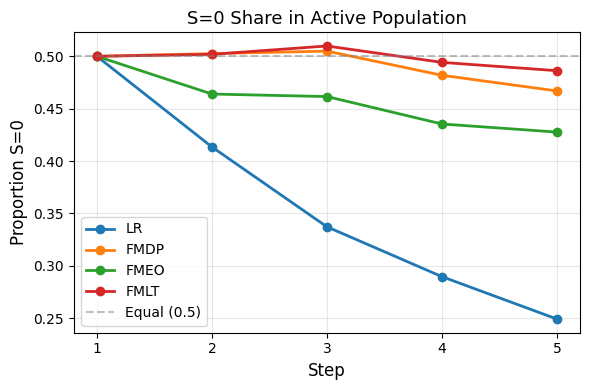

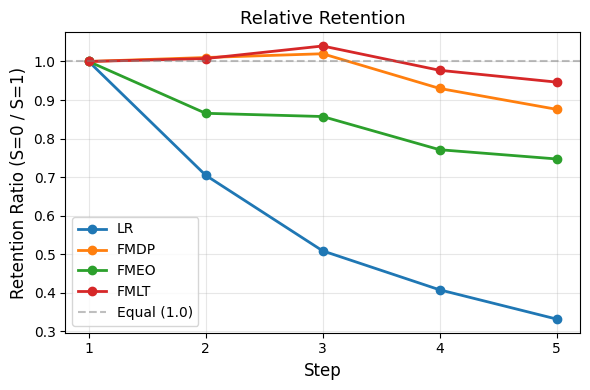

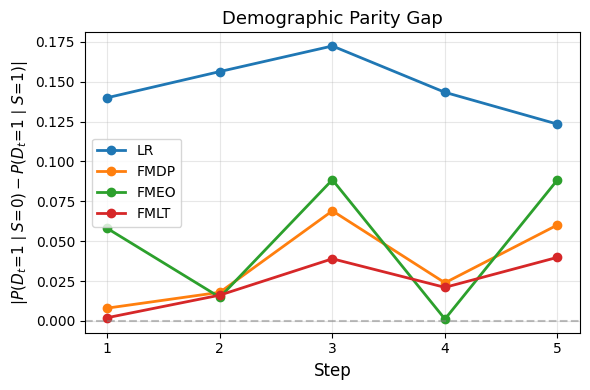

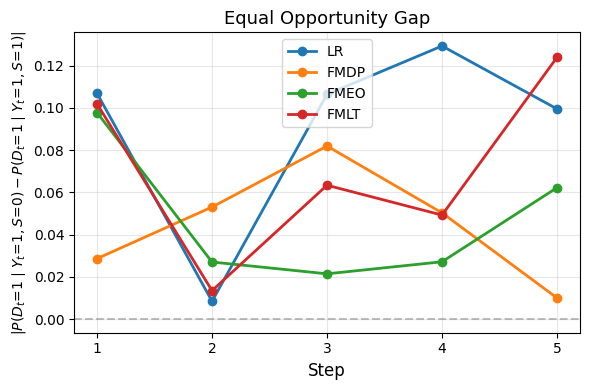

In [24]:
# ── Fairness & Representation Metrics ──
s_e = np.asarray(s_test).astype(int)
n_s0 = max(1, int((s_e == 0).sum()))
n_s1 = max(1, int((s_e == 1).sum()))

fair_metrics = {}
for name in results:
    res = results[name]
    Xs, Ys, Ds, As = res["Xs"], res["Ys"], res["Ds"], res["As"]
    prop_s0, rel_ret, dp_gap, eo_gap = [], [], [], []

    for t in range(T):
        A_t = np.asarray(As[t]).astype(int)
        D_t = np.asarray(Ds[t]).astype(int)
        Y_t = np.asarray(Ys[t]).astype(int)
        active = A_t == 1
        act_s0 = ((s_e == 0) & active).sum()
        act_s1 = ((s_e == 1) & active).sum()

        prop_s0.append(act_s0 / (act_s0 + act_s1) if (act_s0 + act_s1) > 0 else 0.5)
        rel_ret.append((act_s0 / n_s0) / (act_s1 / n_s1) if act_s1 > 0 else 1.0)

        m0, m1 = (s_e == 0) & active, (s_e == 1) & active
        dp_gap.append(abs(D_t[m0].mean() - D_t[m1].mean()) if m0.any() and m1.any() else 0)

        m0y = m0 & (Y_t == 1)
        m1y = m1 & (Y_t == 1)
        eo_gap.append(abs(D_t[m0y].mean() - D_t[m1y].mean()) if m0y.any() and m1y.any() else 0)

    fair_metrics[name] = {
        "prop_s0": np.array(prop_s0), "rel_ret": np.array(rel_ret),
        "dp_gap": np.array(dp_gap), "eo_gap": np.array(eo_gap),
    }

# 1. S=0 Share
fig, ax = plt.subplots(figsize=(6, 4))
for name in results:
    ax.plot(step_arr, fair_metrics[name]["prop_s0"], 'o-', color=colors[name], label=name, linewidth=2, markersize=6)
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Equal (0.5)')
ax.set_xlabel('Step', fontsize=12); ax.set_ylabel('Proportion S=0', fontsize=12)
ax.set_title('S=0 Share in Active Population', fontsize=13)
ax.set_xticks(step_arr); ax.legend(fontsize=10); ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# 2. Relative Retention
fig, ax = plt.subplots(figsize=(6, 4))
for name in results:
    ax.plot(step_arr, fair_metrics[name]["rel_ret"], 'o-', color=colors[name], label=name, linewidth=2, markersize=6)
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Equal (1.0)')
ax.set_xlabel('Step', fontsize=12); ax.set_ylabel('Retention Ratio (S=0 / S=1)', fontsize=12)
ax.set_title('Relative Retention', fontsize=13)
ax.set_xticks(step_arr); ax.legend(fontsize=10); ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# 3. Demographic Parity Gap
fig, ax = plt.subplots(figsize=(6, 4))
for name in results:
    ax.plot(step_arr, fair_metrics[name]["dp_gap"], 'o-', color=colors[name], label=name, linewidth=2, markersize=6)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Step', fontsize=12)
ax.set_ylabel(r'$|P(D_t\!=\!1 \mid S\!=\!0) - P(D_t\!=\!1 \mid S\!=\!1)|$', fontsize=11)
ax.set_title('Demographic Parity Gap', fontsize=13)
ax.set_xticks(step_arr); ax.legend(fontsize=10); ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()

# 4. Equal Opportunity Gap
fig, ax = plt.subplots(figsize=(6, 4))
for name in results:
    ax.plot(step_arr, fair_metrics[name]["eo_gap"], 'o-', color=colors[name], label=name, linewidth=2, markersize=6)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax.set_xlabel('Step', fontsize=12)
ax.set_ylabel(r'$|P(D_t\!=\!1 \mid Y_t\!=\!1,S\!=\!0) - P(D_t\!=\!1 \mid Y_t\!=\!1,S\!=\!1)|$', fontsize=10)
ax.set_title('Equal Opportunity Gap', fontsize=13)
ax.set_xticks(step_arr); ax.legend(fontsize=10); ax.grid(True, alpha=0.3)
plt.tight_layout(); plt.show()



In [45]:
from generator import Agent
print([m for m in dir(Agent) if not m.startswith('_')])

['compute_observed_rejection_gap', 'gen_init_profile', 'gen_next_profile', 'set_eps']


In [46]:
if not hasattr(Agent, 'compute_observed_rejection_gap'):
  from generator import Agent

def compute_observed_rejection_gap(self, #agent
                                   adj, #matrix for social network
                                   D, # array for decisions at time t
                                   s, # array for protected attributes
                                   active=None, # array for indicating who is still in the system 1 means active, 0 means opted out
                                   exclude_inactive_from_denominator=True): #if true dont count for opted-out neighbouts
    """
    Compute peer spillover signal O_t for each agent.
    Looks at neighbours into two groups (in-group, outgroup)
    computes rejection rate for each group
    """
    n = len(s) #get total nr of applicants
    D = np.asarray(D, dtype=int)
    s = np.asarray(s, dtype=int)
    adj = np.asarray(adj)

    if active is None:
        active = np.ones(n, dtype=int)
    active = np.asarray(active, dtype=int)

    O = np.zeros(n, dtype=int)

    for i in range(n):
        neighbors = np.where(adj[i] > 0)[0] #find all neighbours by looking at row i of the adjacency matrix

        if len(neighbors) == 0: #if no neighbours skipp to next applicant
            continue

        if exclude_inactive_from_denominator:
            neighbors = neighbors[active[neighbors] == 1]

        if len(neighbors) == 0:
            continue

        in_group = neighbors[s[neighbors] == s[i]]
        out_group = neighbors[s[neighbors] != s[i]]

        r_in = np.mean(D[in_group] == 0) if len(in_group) > 0 else 0.0
        r_out = np.mean(D[out_group] == 0) if len(out_group) > 0 else 0.0

        O[i] = 1 if r_in > r_out else 0

    return O

# Add the method to the Agent class
Agent.compute_observed_rejection_gap = compute_observed_rejection_gap

#print("Method added successfully!")

In [47]:
from generator import Agent
print([m for m in dir(Agent) if not m.startswith('_')])

['compute_observed_rejection_gap', 'gen_init_profile', 'gen_next_profile', 'set_eps']


# Set up environment

In [48]:
# Check the function signature
from generator import gen_multi_step_profiles
import inspect
print(inspect.signature(gen_multi_step_profiles))

# Also check the Agent class
from generator import Agent
print(inspect.signature(Agent.gen_next_profile))

(model, agent, steps, noise=(0.05, 0.1), seed=2021)
(self, s, X, model)


In [49]:
bank = Bank()
agent_train = Agent(n_samples=4000, protect_ratio=0.5, eps=0.5, base=[0.2, 1.0], seed=2026)
agent_test = Agent(n_samples=1000, protect_ratio=0.5, eps=0.5, base= [0.2, 1.0], seed=2027)


#generate training data
s_train, Xs_train, Ys_train = gen_multi_step_profiles(bank, agent_train, steps=5)
s_comb, X_comb, Y_comb = combine_tuples(s_train, Xs_train, Ys_train)

#train all models
d = X_comb.shape[1]

# Train Models

## Train Baseline model (LR, linear regression)

In [50]:
lr = LR(l2_reg=1e-5)
lr.train(s_comb, X_comb, Y_comb)

## Train Hu's Fairness Model

In [51]:
fm = FairModel(n_features=d + 1, lr=5e-3, l2_reg=1e-5, sf_reg=0.119, lf_reg=0.154)
fm.train(s_train, Xs_train, Ys_train, Xs_train, Ys_train, epochs=1000, plot=False)

In [52]:
# Retrain FM iteratively (as in the notebook)
num_iters = 50
for t in range(num_iters):
    _, NXs_train, NYs_train = gen_multi_step_profiles(fm, agent_train, steps=5)
    fm.train(s_train, Xs_train, Ys_train, NXs_train, NYs_train, epochs=10, plot=False)
print("FM Retraining Done!")

FM Retraining Done!


## Train DP Model

In [53]:
d = X_comb.shape[1]
dp_model = CvxFairModel(n_features= d+ 1, l2_reg=1e-5, tao=1.565)
dp_model.train(s_comb, X_comb, Y_comb)

[Fair Model with Demographic Parity] status: optimal, loss: 0.5854


## Train EO model

In [54]:
eo_model = EOFairModel(n_features=d+2, l2_reg=1e-5, tao=1.5)
eo_model.train(s_comb, X_comb, Y_comb)


[Fair Model with Equal Oppertunity] status: optimal, loss: 0.5987


# Run Simulation

In [55]:
def run_and_evaluate(model, model_name, bank, agent, steps=5):
    s, adj, edges, Xs, Ys, Ds, Ps, Os, Us, As = run_simulation(
        decision_model=model,
        repayment_model=bank,
        agent=agent,
        steps=steps,
        enforce_demographic_mixing=True,
        k_same=8,
        k_other=2,
        directed=False,
        graph_seed=2026,
        seed=2026,
        decision_coef=0.8,
        repayment_coef=0.8,
    )

    print(f"\n{'='*60}")
    print(f"=== {model_name} ===")
    print('='*60)

    # Fairness statistics
    compute_statistics(s, Xs, Ds, model, OYs=Ys)

    # Retention rates
    print(f"\nRetention rates ({model_name}):")
    s_arr = np.array(s)
    for t in range(len(As)):
        A_t = np.array(As[t])
        overall = np.mean(A_t) * 100
        r_s0 = np.mean(A_t[s_arr == 0]) * 100
        r_s1 = np.mean(A_t[s_arr == 1]) * 100
        disparity = abs(r_s0 - r_s1)
        print(f"Step {t+1}: Retention={overall:.1f}%, R(S=0)={r_s0:.1f}%, R(S=1)={r_s1:.1f}%, Disparity={disparity:.1f}%")

    return s, Xs, Ys, Ds, As


# Run for all four models
print("\n" + "="*60)
print("RUNNING ALL SIMULATIONS")
print("="*60)

results_lr = run_and_evaluate(lr, "Baseline (LR)", bank, agent_train)
results_fm = run_and_evaluate(fm, "FM (Hu et al.)", bank, agent_train)
results_eo = run_and_evaluate(eo_model, "EO", bank, agent_train)
results_dp = run_and_evaluate(dp_model, "DP", bank, agent_train)



RUNNING ALL SIMULATIONS

=== Baseline (LR) ===
------------------------------ Step 1 - Logistic Regression ------------------------------
Acc: 73.0%
Retention: 100.0%
Short Fairness: 0.101
Long fairness: 0.077
------------------------------ Step 2 - Logistic Regression ------------------------------
Acc: 72.8%
Retention: 100.0%
Short Fairness: 0.102
Long fairness: 0.150
------------------------------ Step 3 - Logistic Regression ------------------------------
Acc: 72.8%
Retention: 100.0%
Short Fairness: 0.105
Long fairness: 0.150
------------------------------ Step 4 - Logistic Regression ------------------------------
Acc: 72.7%
Retention: 100.0%
Short Fairness: 0.106
Long fairness: 0.214
------------------------------ Step 5 - Logistic Regression ------------------------------
Acc: 73.2%
Retention: 100.0%
Short Fairness: 0.103
Long fairness: 0.259



Retention rates (Baseline (LR)):
Step 1: Retention=100.0%, R(S=0)=100.0%, R(S=1)=100.0%, Disparity=0.0%
Step 2: Retention=68.6%, R(S=0

# Create figures

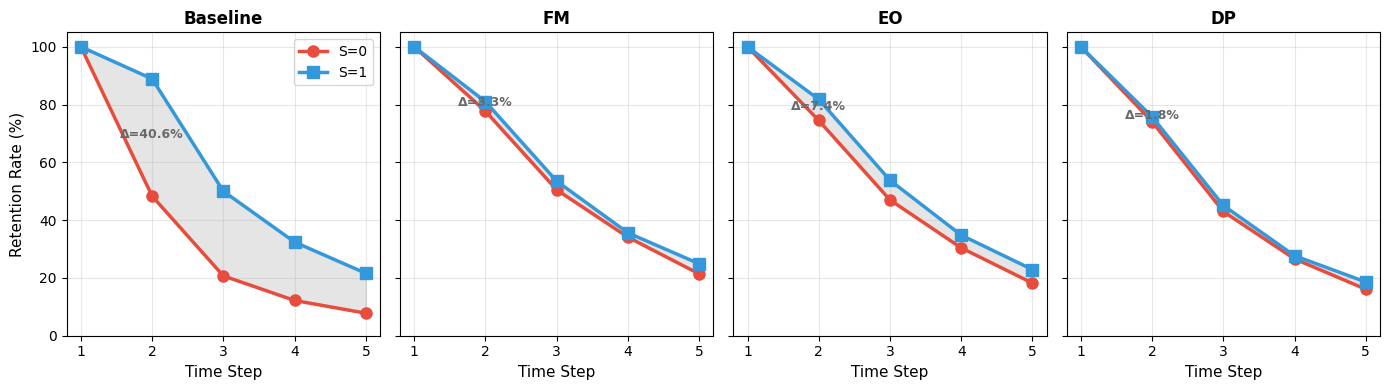

In [56]:
import matplotlib.pyplot as plt

steps = [1,2,3,4,5]

results = {
    'Baseline': {
        'S=0': [100.0, 48.3, 20.7, 12.2, 7.8],
        'S=1': [100.0, 88.9, 50.0, 32.4, 21.6],
        'disparity': [0.0, 40.6, 29.3, 20.1, 13.7],
        'long_fairness': [0.077, 0.150, 0.150, 0.214, 0.259]
    },
    'FM': {
        'S=0': [100.0, 77.7, 50.5, 34.1, 21.4],
        'S=1': [100.0, 81.0, 53.5, 35.6, 24.9],
        'disparity': [0.0, 3.3, 3.0, 1.5, 3.5],
        'long_fairness': [0.002, 0.012, 0.013, 0.051, 0.076]
    },
    'EO': {
        'S=0': [100.0, 74.5, 47.0, 30.4, 18.2],
        'S=1': [100.0, 81.8, 53.8, 34.8, 22.9],
        'disparity': [0.0, 7.4, 6.8, 4.3, 4.7],
        'long_fairness': [0.146, 0.199, 0.208, 0.304, 0.376]
    },
    'DP': {
        'S=0': [100.0, 74.1, 43.0, 26.6, 16.1],
        'S=1': [100.0, 75.8, 45.1, 27.7, 18.6],
        'disparity': [0.0, 1.8, 2.1, 1.2, 2.6],
        'long_fairness': [0.265, 0.306, 0.377, 0.583, 0.713]
    }
}

#create figure
fig, axes = plt.subplots(1, 4, figsize=(14, 4), sharey=True)

methods = ['Baseline', 'FM', 'EO', 'DP']
colors = {'S=0': '#E74C3C', 'S=1': '#3498DB'}

for idx, method in enumerate(methods):
    ax = axes[idx]

    # Plot retention rates for both groups
    ax.plot(steps, results[method]['S=0'], 'o-', color=colors['S=0'],
            label='S=0', linewidth=2.5, markersize=8)
    ax.plot(steps, results[method]['S=1'], 's-', color=colors['S=1'],
            label='S=1', linewidth=2.5, markersize=8)

    # Shade the gap between groups
    ax.fill_between(steps, results[method]['S=0'], results[method]['S=1'],
                    alpha=0.2, color='gray')

    # Add disparity annotation at step 2
    disparity_t2 = results[method]['disparity'][1]
    mid_y = (results[method]['S=0'][1] + results[method]['S=1'][1]) / 2
    ax.annotate(f'Δ={disparity_t2:.1f}%', xy=(2, mid_y), fontsize=9,
                ha='center', color='dimgray', fontweight='bold')

    ax.set_xlabel('Time Step', fontsize=11)
    if idx == 0:
        ax.set_ylabel('Retention Rate (%)', fontsize=11)
    ax.set_title(method, fontsize=12, fontweight='bold')
    ax.set_ylim(0, 105)
    ax.set_xticks(steps)
    ax.grid(True, alpha=0.3)

    if idx == 0:
        ax.legend(loc='upper right', fontsize=10)

plt.tight_layout()
plt.savefig('retention_by_group.png', dpi=300, bbox_inches='tight')
plt.savefig('retention_by_group.pdf', bbox_inches='tight')
plt.show()

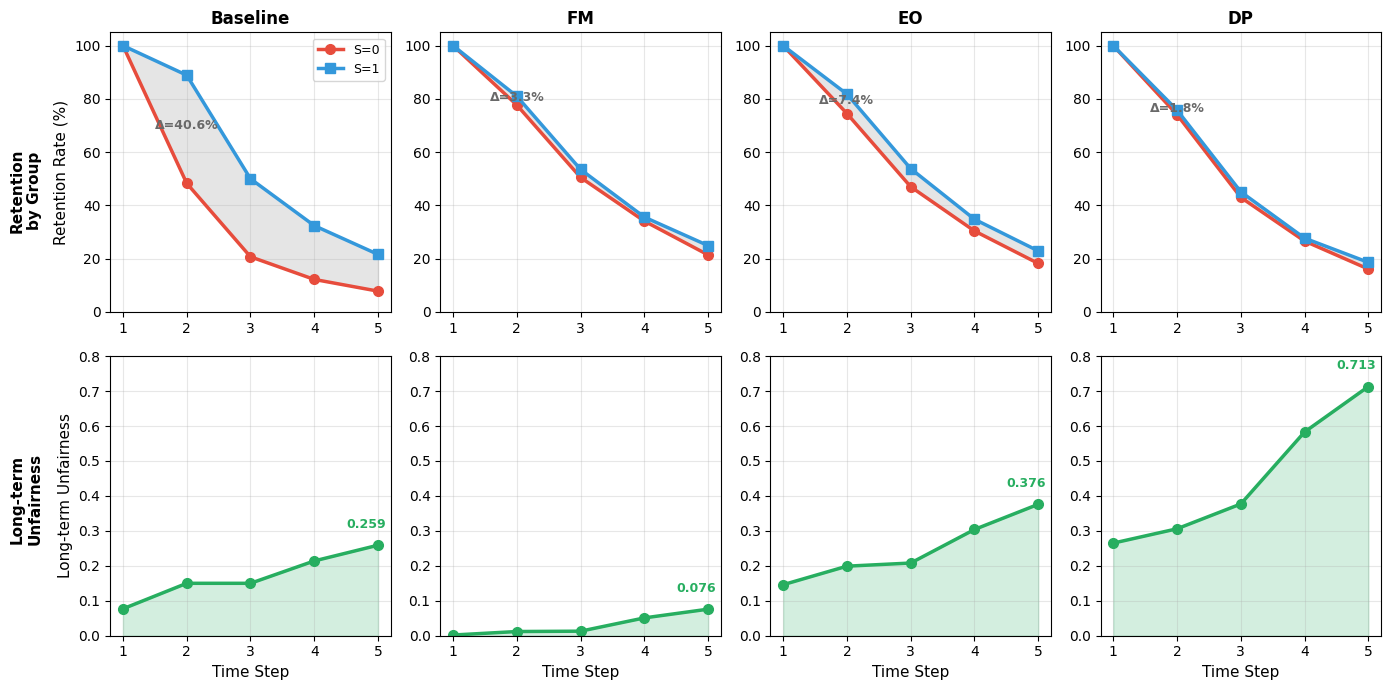

Figure saved as 'retention_and_fairness.png' and 'retention_and_fairness.pdf'


In [57]:
#long term fairness and retention

steps = [1, 2, 3, 4, 5]

results = {
    'Baseline': {
        'S=0': [100.0, 48.3, 20.7, 12.2, 7.8],
        'S=1': [100.0, 88.9, 50.0, 32.4, 21.6],
        'disparity': [0.0, 40.6, 29.3, 20.1, 13.7],
        'long_fairness': [0.077, 0.150, 0.150, 0.214, 0.259]
    },
    'FM': {
        'S=0': [100.0, 77.7, 50.5, 34.1, 21.4],
        'S=1': [100.0, 81.0, 53.5, 35.6, 24.9],
        'disparity': [0.0, 3.3, 3.0, 1.5, 3.5],
        'long_fairness': [0.002, 0.012, 0.013, 0.051, 0.076]
    },
    'EO': {
        'S=0': [100.0, 74.5, 47.0, 30.4, 18.2],
        'S=1': [100.0, 81.8, 53.8, 34.8, 22.9],
        'disparity': [0.0, 7.4, 6.8, 4.3, 4.7],
        'long_fairness': [0.146, 0.199, 0.208, 0.304, 0.376]
    },
    'DP': {
        'S=0': [100.0, 74.1, 43.0, 26.6, 16.1],
        'S=1': [100.0, 75.8, 45.1, 27.7, 18.6],
        'disparity': [0.0, 1.8, 2.1, 1.2, 2.6],
        'long_fairness': [0.265, 0.306, 0.377, 0.583, 0.713]
    }
}

# Create figure with 2 rows x 4 columns
fig, axes = plt.subplots(2, 4, figsize=(14, 7))

methods = ['Baseline', 'FM', 'EO', 'DP']
colors = {'S=0': '#E74C3C', 'S=1': '#3498DB'}
fairness_color = '#27AE60'

for idx, method in enumerate(methods):
    ax_top = axes[0, idx]
    ax_bottom = axes[1, idx]

    # ===== TOP ROW: Retention rates by group =====
    ax_top.plot(steps, results[method]['S=0'], 'o-', color=colors['S=0'],
                label='S=0', linewidth=2.5, markersize=7)
    ax_top.plot(steps, results[method]['S=1'], 's-', color=colors['S=1'],
                label='S=1', linewidth=2.5, markersize=7)

    # Shade the gap between groups
    ax_top.fill_between(steps, results[method]['S=0'], results[method]['S=1'],
                        alpha=0.2, color='gray')

    # Add disparity annotation at step 2
    disparity_t2 = results[method]['disparity'][1]
    mid_y = (results[method]['S=0'][1] + results[method]['S=1'][1]) / 2
    ax_top.annotate(f'Δ={disparity_t2:.1f}%', xy=(2, mid_y), fontsize=9,
                    ha='center', color='dimgray', fontweight='bold')

    ax_top.set_title(method, fontsize=12, fontweight='bold')
    ax_top.set_ylim(0, 105)
    ax_top.set_xticks(steps)
    ax_top.grid(True, alpha=0.3)

    if idx == 0:
        ax_top.set_ylabel('Retention Rate (%)', fontsize=11)
        ax_top.legend(loc='upper right', fontsize=9)

    # ===== BOTTOM ROW: Long-term fairness =====
    ax_bottom.plot(steps, results[method]['long_fairness'], 'o-',
                   color=fairness_color, linewidth=2.5, markersize=7)
    ax_bottom.fill_between(steps, 0, results[method]['long_fairness'],
                           alpha=0.2, color=fairness_color)

    # Add final value annotation
    final_fairness = results[method]['long_fairness'][-1]
    ax_bottom.annotate(f'{final_fairness:.3f}',
                       xy=(5, final_fairness),
                       xytext=(4.5, final_fairness + 0.05),
                       fontsize=9, color=fairness_color, fontweight='bold')

    ax_bottom.set_xlabel('Time Step', fontsize=11)
    ax_bottom.set_xticks(steps)
    ax_bottom.set_ylim(0, 0.8)
    ax_bottom.grid(True, alpha=0.3)

    if idx == 0:
        ax_bottom.set_ylabel('Long-term Unfairness', fontsize=11)

# Add row labels on the left
fig.text(0.02, 0.72, 'Retention\nby Group', ha='center', va='center',
         fontsize=11, fontweight='bold', rotation=90)
fig.text(0.02, 0.28, 'Long-term\nUnfairness', ha='center', va='center',
         fontsize=11, fontweight='bold', rotation=90)

plt.tight_layout()
plt.subplots_adjust(left=0.08)
plt.savefig('retention_and_fairness.png', dpi=300, bbox_inches='tight')
plt.savefig('retention_and_fairness.pdf', bbox_inches='tight')
plt.show()

print("Figure saved as 'retention_and_fairness.png' and 'retention_and_fairness.pdf'")

## detailed metrics for signed differences and conditional fairness

In [62]:
#run simulations and store results for each method

def run_and_store(model, model_name, bank, agent, steps=5):
    """Run simulation and return all results."""
    s, adj, edges, Xs, Ys, Ds, Ps, Os, Us, As = run_simulation(
        decision_model=model,
        repayment_model=bank,
        agent=agent,
        steps=steps,
        enforce_demographic_mixing=True,
        k_same=8,
        k_other=2,
        directed=False,
        graph_seed=2026,
        seed=2026,
        decision_coef=0.8,
        repayment_coef=0.8,
    )
    return {
        'name': model_name,
        's': s,
        'Xs': Xs,
        'Ys': Ys,
        'Ds': Ds,
        'Ps': Ps,
        'Os': Os,
        'Us': Us,
        'As': As
    }

# Run simulations for all methods
results_baseline = run_and_store(lr, "Baseline", bank, agent_train)
results_fm = run_and_store(fm, "FM", bank, agent_train)
results_eo = run_and_store(eo_model, "EO", bank, agent_train)
results_dp = run_and_store(dp_model, "DP", bank, agent_train)

print("All simulations complete!")

All simulations complete!


In [64]:
def compute_detailed_metrics(s, As, Ds, Ys):
    """Compute signed differences, group sizes, and representation ratios."""

    s = np.array(s)
    n_s0_total = np.sum(s == 0)
    n_s1_total = np.sum(s == 1)

    print("Step | N(S=0) | N(S=1) | S=0 Share | Rep. Ratio | Signed Δ(Approval)")
    print("-" * 75)

    for t in range(len(As)):
        A_t = np.array(As[t])
        D_t = np.array(Ds[t])

        # Active counts per group
        active_s0 = np.sum((s == 0) & (A_t == 1))
        active_s1 = np.sum((s == 1) & (A_t == 1))
        total_active = active_s0 + active_s1

        # S=0 share of active population that belongs to s=0. 0.50 means equal representation
        s0_share = active_s0 / total_active if total_active > 0 else 0

        # Retention rates
        retention_s0 = active_s0 / n_s0_total
        retention_s1 = active_s1 / n_s1_total

        # Representation ratio
        rep_ratio = retention_s0 / retention_s1 if retention_s1 > 0 else 0

        # Signed approval rate difference (among active only)
        active_mask = A_t == 1
        if active_s0 > 0 and active_s1 > 0:
            approval_s0 = np.mean(D_t[(s == 0) & active_mask])
            approval_s1 = np.mean(D_t[(s == 1) & active_mask])
            signed_delta = approval_s0 - approval_s1  # Negative = S=0 disadvantaged
        else:
            signed_delta = np.nan

        print(f"  {t+1}  |  {active_s0:4d}  |  {active_s1:4d}  |   {s0_share:.2f}    |    {rep_ratio:.2f}    |      {signed_delta:+.3f}")

# Run for each method
print("\n=== Baseline ===")
compute_detailed_metrics(results_baseline['s'], results_baseline['As'], results_baseline['Ds'], results_baseline['Ys'])

print("\n=== FM ===")
compute_detailed_metrics(results_fm['s'], results_fm['As'], results_fm['Ds'], results_fm['Ys'])

print("\n=== EO ===")
compute_detailed_metrics(results_eo['s'], results_eo['As'], results_eo['Ds'], results_eo['Ys'])

print("\n=== DP ===")
compute_detailed_metrics(results_dp['s'], results_dp['As'], results_dp['Ds'], results_dp['Ys'])


=== Baseline ===
Step | N(S=0) | N(S=1) | S=0 Share | Rep. Ratio | Signed Δ(Approval)
---------------------------------------------------------------------------
  1  |  2000  |  2000  |   0.50    |    1.00    |      -0.235
  2  |   966  |  1778  |   0.35    |    0.54    |      -0.177
  3  |   414  |  1000  |   0.29    |    0.41    |      -0.177
  4  |   245  |   648  |   0.27    |    0.38    |      -0.125
  5  |   157  |   431  |   0.27    |    0.36    |      -0.091

=== FM ===
Step | N(S=0) | N(S=1) | S=0 Share | Rep. Ratio | Signed Δ(Approval)
---------------------------------------------------------------------------
  1  |  2000  |  2000  |   0.50    |    1.00    |      -0.032
  2  |  1554  |  1620  |   0.49    |    0.96    |      -0.017
  3  |  1010  |  1071  |   0.49    |    0.94    |      -0.021
  4  |   682  |   713  |   0.49    |    0.96    |      -0.064
  5  |   429  |   499  |   0.46    |    0.86    |      -0.031

=== EO ===
Step | N(S=0) | N(S=1) | S=0 Share | Rep. Ratio 

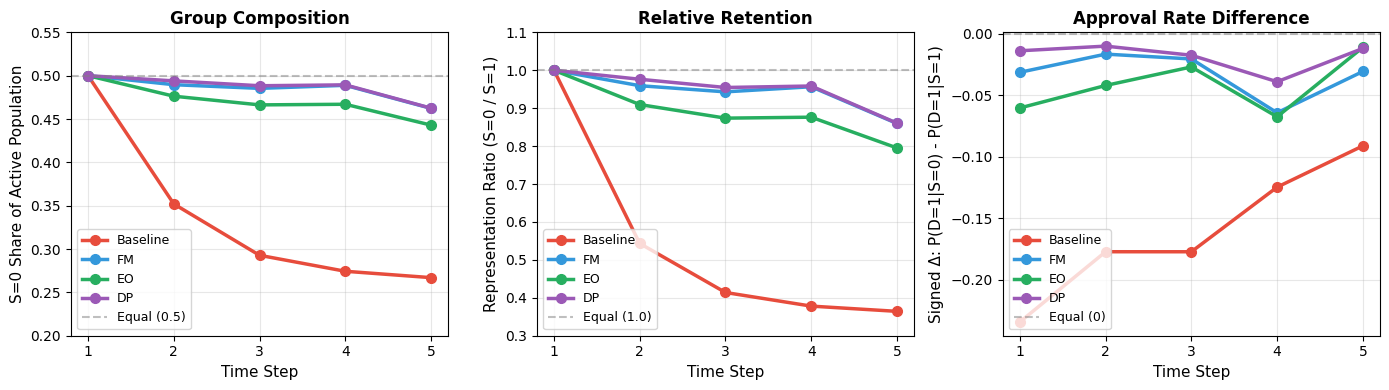

Figure saved as 'group_dynamics.png' and 'group_dynamics.pdf'


In [65]:
#plot
steps = [1, 2, 3, 4, 5]

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

methods = ['Baseline', 'FM', 'EO', 'DP']
colors = {'Baseline': '#E74C3C', 'FM': '#3498DB', 'EO': '#27AE60', 'DP': '#9B59B6'}
all_metrics = {
    'Baseline': metrics_baseline,
    'FM': metrics_fm,
    'EO': metrics_eo,
    'DP': metrics_dp
}

# Plot 1: S=0 Share over time
ax = axes[0]
for method in methods:
    ax.plot(steps, all_metrics[method]['s0_share'], 'o-',
            color=colors[method], label=method, linewidth=2.5, markersize=7)
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Equal (0.5)')
ax.set_xlabel('Time Step', fontsize=11)
ax.set_ylabel('S=0 Share of Active Population', fontsize=11)
ax.set_title('Group Composition', fontsize=12, fontweight='bold')
ax.set_ylim(0.2, 0.55)
ax.set_xticks(steps)
ax.legend(loc='lower left', fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 2: Representation Ratio over time
ax = axes[1]
for method in methods:
    ax.plot(steps, all_metrics[method]['rep_ratio'], 'o-',
            color=colors[method], label=method, linewidth=2.5, markersize=7)
ax.axhline(y=1.0, color='gray', linestyle='--', alpha=0.5, label='Equal (1.0)')
ax.set_xlabel('Time Step', fontsize=11)
ax.set_ylabel('Representation Ratio (S=0 / S=1)', fontsize=11)
ax.set_title('Relative Retention', fontsize=12, fontweight='bold')
ax.set_ylim(0.3, 1.1)
ax.set_xticks(steps)
ax.legend(loc='lower left', fontsize=9)
ax.grid(True, alpha=0.3)

# Plot 3: Signed Approval Difference over time
ax = axes[2]
for method in methods:
    ax.plot(steps, all_metrics[method]['signed_delta'], 'o-',
            color=colors[method], label=method, linewidth=2.5, markersize=7)
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5, label='Equal (0)')
ax.set_xlabel('Time Step', fontsize=11)
ax.set_ylabel('Signed Δ: P(D=1|S=0) - P(D=1|S=1)', fontsize=11)
ax.set_title('Approval Rate Difference', fontsize=12, fontweight='bold')
ax.set_xticks(steps)
ax.legend(loc='lower left', fontsize=9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('group_dynamics.png', dpi=300, bbox_inches='tight')
plt.savefig('group_dynamics.pdf', bbox_inches='tight')
plt.show()

print("Figure saved as 'group_dynamics.png' and 'group_dynamics.pdf'")